**ACTIVIDAD 2 - DATASET DESAPARECIDOS COLOMBIA 1930 A MARZOZ 2024**

**Abstracto con Motivación y Audiencia**
El presente análisis se enfoca en el dataset de personas desaparecidas en Colombia desde 1930 hasta marzo de 2024, con el objetivo de comprender las dinámicas de desapariciones en el país. La motivación detrás de este estudio radica en la necesidad de visibilizar y analizar la problemática de las desapariciones forzadas e involuntarias, un fenómeno que ha afectado a miles de familias colombianas.

**Hipótesis 1:** La tasa de desapariciones en los últimos cuatro años (2020-2024) ha disminuido significativamente en comparación con las décadas anteriores (1930-2019).
*   Justificación: Puede ser inferior el número de desaparecidos ya que el conflicto armado y grupos guerrilleros, aunque existen aún, son minoritarios y el impacto menor en las desapariciones dentro de la sociedad.

**Hipótesis2:** Ciertos contextos geográficos (municipios y departamentos) y de pertenencia grupal están asociados con un mayor riesgo de desaparición.
*   *Justificación: La presencia de grupos armados, la pobreza y la exclusión social pueden aumentar la vulnerabilidad a la desaparición. 

**Preguntas/Hipótesis que se quiere Resolver**

1. ¿Que departamentos de Colombia tienen el mayor nro de desaparecidos?
2. ¿De los de departamentos con mayor desaparecidos, hay mas hombres o mujeres desaparecidas?
3. ¿Cuantos continuan desaparecidos, cuandos aparecen y en que estado?


In [19]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
path=os.getcwd()
print(path)
file="Desaparecidos._Colombia__hist_rico__a_os_1930_a_marzo_de_2024_20240729.csv"
full_path = os.path.join(path,'DATA', file)
print(full_path)
tabla=pd.read_csv(full_path,sep=',',encoding='utf-8')
tabla.head()

c:\Users\david\Downloads\BITrepository
c:\Users\david\Downloads\BITrepository\DATA\Desaparecidos._Colombia__hist_rico__a_os_1930_a_marzo_de_2024_20240729.csv


,ID,Estado de la desaparición,Clasificación de la desaparición,Fecha de la desaparición,Edad al momento de la desaparición,Sexo del desaparecido,País de nacimiento del desaparecido,Ancestro racial del desaparecido,Estado civil del desaparecido,Escolaridad del desaparecido,Pertenencia grupal del desaparecido,País donde ocurre la desaparición,Municipio donde ocurre la desaparición DANE,Departamento donde ocurre la desaparición DANE,Contexto
0,1,Desaparecido,Sin Información,2006-12-29T00:00:00.000,21,Hombre,Sin información,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
1,2,Desaparecido,Sin Información,2006-12-26T00:00:00.000,24,Hombre,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Persona adicta a una droga natural o sintética,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
2,3,Desaparecido,Sin Información,2006-12-29T00:00:00.000,13,Mujer,Colombia,Mestizo,Soltero (a),Educación básica secundaria o secundaria baja,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
3,4,Aparecio Vivo,Sin Información,2006-12-29T00:00:00.000,17,Mujer,Sin información,Mestizo,Soltero (a),Educación técnica profesional y tecnológica,Ninguno,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición
4,5,Aparecio Vivo,Sin Información,2006-12-31T00:00:00.000,71,Hombre,Colombia,Mestizo,Unión Libre,Educación básica primaria,Otro,Colombia,Bogotá D.C.,Bogotá D.C.,Desaparición


**Grafica 1 - Estadística desaparecidos por departamento**

In [20]:
import matplotlib.pyplot as plt

departamentos_count = tabla["Departamento donde ocurre la desaparición DANE"].value_counts()
departamentos_count

Departamento donde ocurre la desaparición DANE
Bogotá D.C.                                54654
Antioquia                                  24675
Valle Del Cauca                            16575
Meta                                        7943
Cundinamarca                                6976
Norte De Santander                          6453
Risaralda                                   5532
Caldas                                      5331
Nariño                                      4769
Tolima                                      4433
Santander                                   4312
Magdalena                                   4133
Atlántico                                   3323
Cesar                                       3182
Huila                                       3168
Caquetá                                     3000
Putumayo                                    2937
Boyacá                                      2873
Guaviare                                    2580
Bolívar               

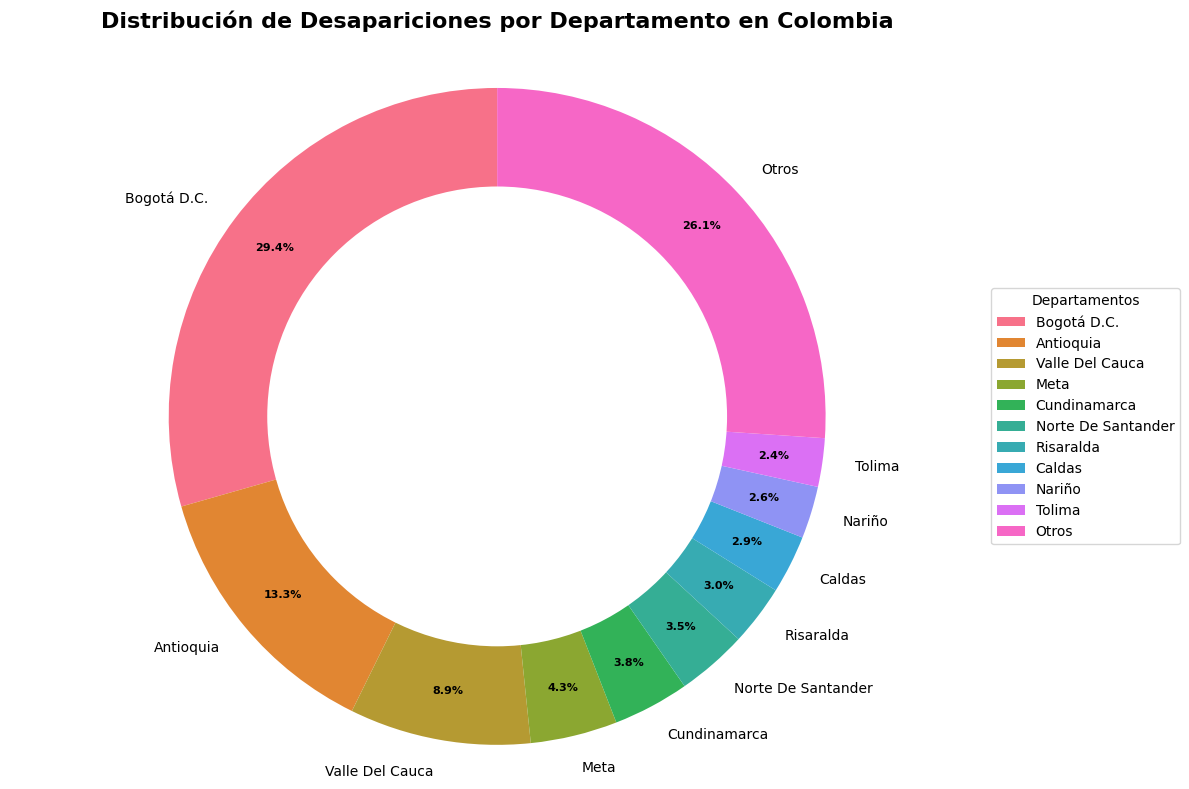

In [23]:
fig, ax = plt.subplots(figsize=(12, 8))
N = 10  # top 10
top_departamentos = departamentos_count.nlargest(N)
otros = departamentos_count.sum() - top_departamentos.sum()
top_departamentos['Otros'] = otros

# Paleta de colores
colors = sns.color_palette('husl', n_colors=len(top_departamentos))

# Pie chart
wedges, texts, autotexts = ax.pie(
    top_departamentos,
    labels=top_departamentos.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    pctdistance=0.85
)

# Circulo en el centro para poner la grafica como una dona
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Aspect ratio igual para generar el circulo
ax.axis('equal')  

# Modificar la apariencia
plt.setp(autotexts, size=8, weight="bold")
plt.setp(texts, size=10)

# titulo
plt.title(
    'Distribución de Desapariciones por Departamento en Colombia',
    fontsize=16,
    fontweight='bold',
    pad=20
)

# leyenda
ax.legend(
    wedges,
    top_departamentos.index,
    title="Departamentos",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.tight_layout()
plt.show()

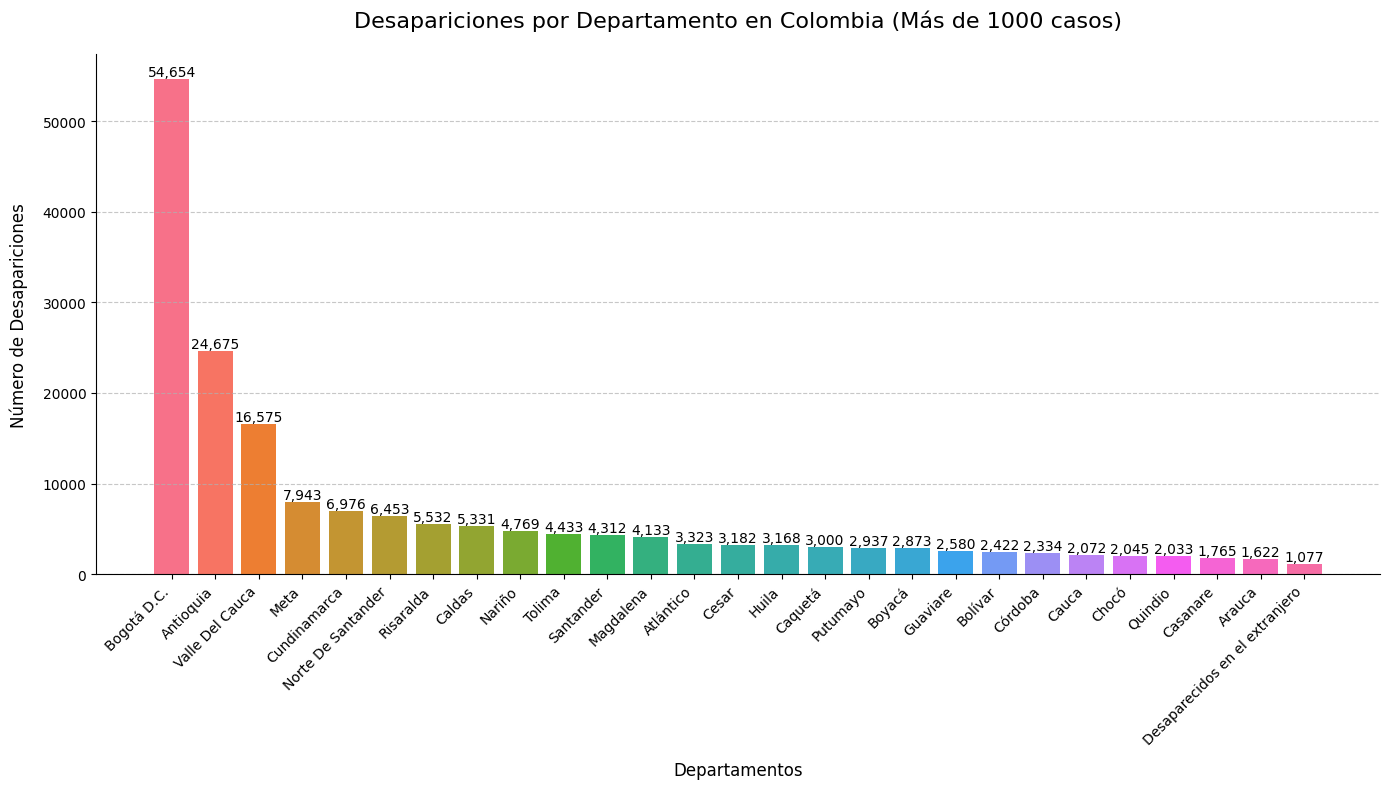

In [25]:
# Filtrar y ordenar la data
departamentos_filtrado = departamentos_count[departamentos_count > 1000].sort_values(ascending=False)

# Figura
fig, ax = plt.subplots(figsize=(14, 8))

# Barplot
bars = ax.bar(
    departamentos_filtrado.index,
    departamentos_filtrado.values,
    color=sns.color_palette("husl", len(departamentos_filtrado))
)

# Customizar la apariencia
ax.set_xlabel('Departamentos', fontsize=12, labelpad=10)
ax.set_ylabel('Número de Desapariciones', fontsize=12, labelpad=10)
ax.set_title('Desapariciones por Departamento en Colombia (Más de 1000 casos)', fontsize=16, pad=20)

# rotar el eje x
plt.xticks(rotation=45, ha='right')

# Agregar leyendas
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{int(height):,}',
        ha='center',
        va='bottom',
        rotation=0,
        fontsize=10
    )

# Gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Removes spines de los laterales
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

**¿Que departamentos de Colombia tienen el mayor nro de desaparecidos?**

**Análisis**
Se puede observar que los departamentos con mayor nro de desaparecidos son los de Bogotá, Antioquia y Valle del Cauca, casualmente los departamentos mas poblados y con las principales ciudades del País.
Mientras que en los departamentos mas aislados de las ciudades principales como Guainía, Vaupés y San Andrés.


**Grafica 2 - Estadística desaparecidos por los tres departamentos con mayor número por Sexo**

In [26]:

# Agrupar por departamento y sexo
sexo_departamento_counts = tabla.groupby(['Departamento donde ocurre la desaparición DANE','Sexo del desaparecido']).size().reset_index(name='Cantidad')

# Obtener los tres departamentos con más desapariciones
top_departamentos = sexo_departamento_counts.groupby('Departamento donde ocurre la desaparición DANE')['Cantidad'].sum().nlargest(3).index

# Filtrar los datos para incluir solo los tres departamentos principales
datos_filtrados = sexo_departamento_counts[sexo_departamento_counts['Departamento donde ocurre la desaparición DANE'].isin(top_departamentos)]   

datos_filtrados

,Departamento donde ocurre la desaparición DANE,Sexo del desaparecido,Cantidad
2,Antioquia,Hombre,19839
3,Antioquia,Mujer,4836
8,Bogotá D.C.,Hombre,30740
9,Bogotá D.C.,Mujer,23914
66,Valle Del Cauca,Hombre,12154
67,Valle Del Cauca,Mujer,4421


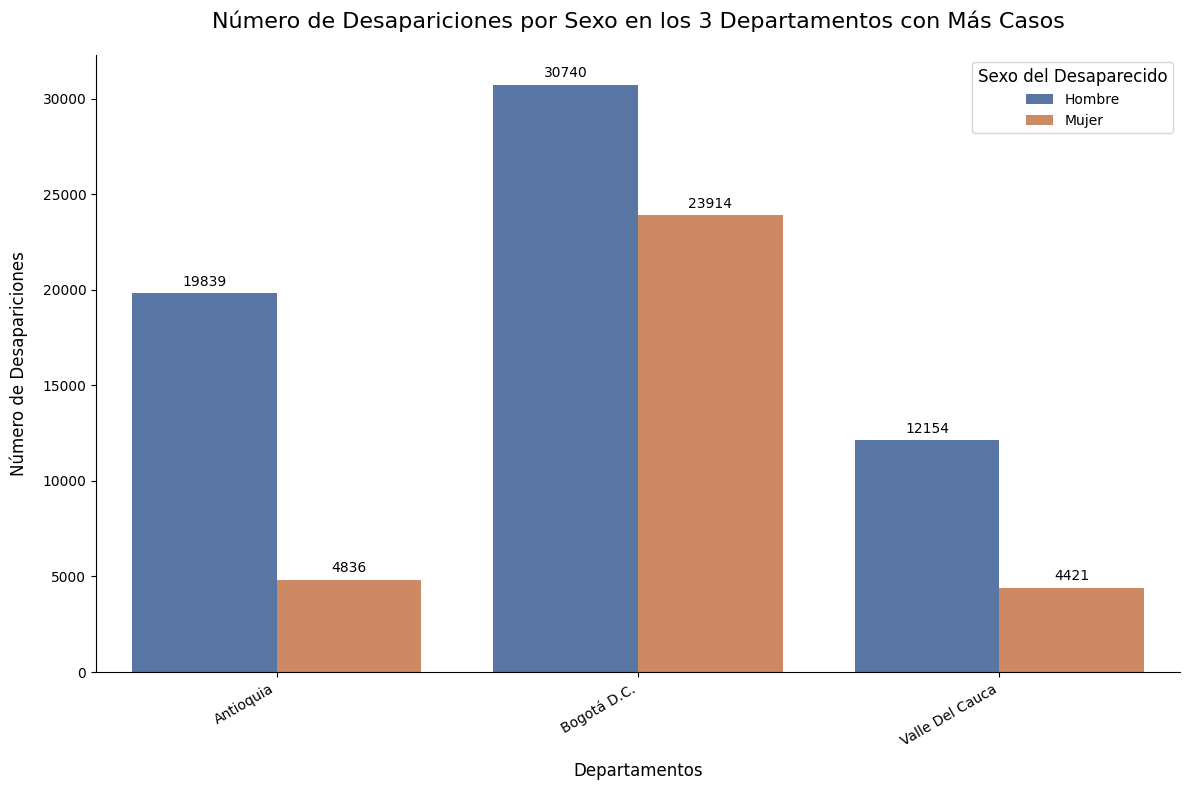

In [27]:
# Figura
fig, ax = plt.subplots(figsize=(12, 8))

# Barplot
sns.barplot(
    data=datos_filtrados,
    x='Departamento donde ocurre la desaparición DANE',
    y='Cantidad',
    hue='Sexo del desaparecido',
    palette='deep',
    ax=ax
)

# Customizar apariencia
ax.set_title('Número de Desapariciones por Sexo en los 3 Departamentos con Más Casos', fontsize=16, pad=20)
ax.set_xlabel('Departamentos', fontsize=12, labelpad=10)
ax.set_ylabel('Número de Desapariciones', fontsize=12, labelpad=10)

# rotar eje x
plt.xticks(rotation=30, ha='right')

# Labels
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10, padding=3)

# Leyenda
ax.legend(title='Sexo del Desaparecido', title_fontsize='12', fontsize='10', loc='upper right')

# Spines de la derecha quitarlos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Ajustar layout
plt.tight_layout()
plt.show()

**¿De los de departamentos con mayor desaparecidos, hay mas hombres o mujeres desaparecidas?**
**Análisis**
Se realiza conteo entre los tres departamentos con mas desaparecidos y se puede observar que en todas tres ciudades en su mayoria son hombres los que mas desaparecen.


**Grafica 3 - Estadística desaparecidos por los tres departamentos con mayor número por Sexo y Estado de la desaparición**

In [5]:

# Agrupar por departamento, sexo y estado de la desaparición, y contar las ocurrencias
estado_sexo_departamento_counts = tabla.groupby(
    ['Departamento donde ocurre la desaparición DANE', 'Sexo del desaparecido', 'Estado de la desaparición']
).size().reset_index(name='Cantidad')

# Obtener los tres departamentos con más desapariciones
top_departamentos = estado_sexo_departamento_counts.groupby('Departamento donde ocurre la desaparición DANE')['Cantidad'].sum().nlargest(3).index

# Filtrar los datos para incluir solo los tres departamentos principales
datos_filtrados = estado_sexo_departamento_counts[estado_sexo_departamento_counts['Departamento donde ocurre la desaparición DANE'].isin(top_departamentos)]
datos_filtrados

,Departamento donde ocurre la desaparición DANE,Sexo del desaparecido,Estado de la desaparición,Cantidad
5,Antioquia,Hombre,Aparecio Muerto,1714
6,Antioquia,Hombre,Aparecio Vivo,4476
7,Antioquia,Hombre,Desaparecido,13649
8,Antioquia,Mujer,Aparecio Muerto,219
9,Antioquia,Mujer,Aparecio Vivo,2595
10,Antioquia,Mujer,Desaparecido,2022
23,Bogotá D.C.,Hombre,Aparecio Muerto,1591
24,Bogotá D.C.,Hombre,Aparecio Vivo,10542
25,Bogotá D.C.,Hombre,Desaparecido,18607
26,Bogotá D.C.,Mujer,Aparecio Muerto,351


In [14]:
import plotly.express as px

fig = px.bar(
    datos_filtrados,
    x='Departamento donde ocurre la desaparición DANE',
    y='Cantidad',
    color='Estado de la desaparición',
    text='Cantidad',
    title='Número de Desapariciones por Sexo y Estado en los 3 Departamentos con Más Casos',
    labels={'Cantidad': 'Número de Desapariciones', 'Departamento donde ocurre la desaparición DANE': 'Departamentos'}
)

fig.show()



**¿Cuantos continuan desaparecidos, cuandos aparecen y en que estado?**
**Análisis**

Con la grafica se puede determinar que mas del 50% de las personas permanecen desparecidas en todas los tres departamentos y solo un mínimo de persona aparecen vivas o muertas
